<a href="https://colab.research.google.com/github/Catherine-Nguyen88/project_voting/blob/main/Voting_Isabella's_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Isabella's part for voting project

In [1]:
# clone from repo
! git clone https://github.com/Catherine-Nguyen88/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 251 (delta 87), reused 132 (delta 72), pack-reused 90
Receiving objects: 100% (251/251), 71.48 MiB | 7.09 MiB/s, done.
Resolving deltas: 100% (123/123), done.
Updating files: 100% (68/68), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('./project_voting/data/voting_VA.csv')
df

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,71966,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,24,12113,20220315,ELECTION DAY
3732,71967,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,0,12113,20220315,PROVISIONAL
3733,71968,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2825,12113,20220315,ABSENTEE
3734,71969,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2370,12113,20220315,ELECTION DAY


## Merging demographics with voting data by county

Testing with one demographics file first (0002_ds176_20105_county_E.csv)

In [ ]:
fname = './project_voting/data/county_data/0002_ds176_20105_county_E.csv'
dem = pd.read_csv(fname) # , encoding='latin-1'
dem.head()

,Unnamed: 0,X.2,X.1,X,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,...,JSDE003,JSDE004,JSDE005,JSDE006,JSDE007,JSDE008,JSDE009,JSDE010,JS5E001,JTIE001
0,1,1,1,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,...,Built 2000 to 2004,Built 1990 to 1999,Built 1980 to 1989,Built 1970 to 1979,Built 1960 to 1969,Built 1950 to 1959,Built 1940 to 1949,Built 1939 or earlier,Median gross rent,Median value (dollars)
1,2,2,2,2,G0100010,2006-2010,AL,NaN,NaN,Alabama,...,2946,5142,3582,3542,2626,931,235,641,769,133900
2,3,3,3,3,G0100030,2006-2010,AL,NaN,NaN,Alabama,...,22743,28796,16210,11233,5768,3516,1678,2541,821,177200
3,4,4,4,4,G0100050,2006-2010,AL,NaN,NaN,Alabama,...,493,2669,2412,2095,1496,966,573,1055,512,88200
4,5,5,5,5,G0100070,2006-2010,AL,NaN,NaN,Alabama,...,381,2202,1452,1591,1226,673,263,890,541,81200


In [ ]:
# need to drop the 1st row
dem = dem.drop([0])
dem.head()

,Unnamed: 0,X.2,X.1,X,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,...,JSDE003,JSDE004,JSDE005,JSDE006,JSDE007,JSDE008,JSDE009,JSDE010,JS5E001,JTIE001
1,2,2,2,2,G0100010,2006-2010,AL,NaN,NaN,Alabama,...,2946,5142,3582,3542,2626,931,235,641,769,133900
2,3,3,3,3,G0100030,2006-2010,AL,NaN,NaN,Alabama,...,22743,28796,16210,11233,5768,3516,1678,2541,821,177200
3,4,4,4,4,G0100050,2006-2010,AL,NaN,NaN,Alabama,...,493,2669,2412,2095,1496,966,573,1055,512,88200
4,5,5,5,5,G0100070,2006-2010,AL,NaN,NaN,Alabama,...,381,2202,1452,1591,1226,673,263,890,541,81200
5,6,6,6,6,G0100090,2006-2010,AL,NaN,NaN,Alabama,...,2366,5520,4054,4169,2335,1482,1032,1313,574,113700


In [ ]:
print(dem.dtypes)


Unnamed: 0     int64
X.2            int64
X.1            int64
X             object
GISJOIN       object
               ...  
JSDE008       object
JSDE009       object
JSDE010       object
JS5E001       object
JTIE001       object
Length: 276, dtype: object


In [ ]:
dem['STATE'] = str(dem['STATE'])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
dem_VA.head()

(0, 276)


,Unnamed: 0,X.2,X.1,X,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,...,JSDE003,JSDE004,JSDE005,JSDE006,JSDE007,JSDE008,JSDE009,JSDE010,JS5E001,JTIE001


In [ ]:
# modify the voting csv dataset to match the county names present in the demographics data
# change to title case and if the county doesnt end in "City", add "County"

def match_county_name(county_name):
  if county_name.endswith('CITY'):
    return county_name.title()
  else:
    return county_name.title() + ' County'

voting_df = df.copy()
voting_df['county_name'] = voting_df['county_name'].apply(lambda x: match_county_name(x))

voting_df.head()


,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,Albemarle County,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL


In [ ]:
# now, for each county, get candidatevotes/totalvotes
voting_df['fractionalvotes'] = voting_df['candidatevotes']/voting_df['totalvotes']
voting_df.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode,fractionalvotes
0,11161,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL,0.427002
1,11162,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL,0.532662
2,11163,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL,0.018449
3,11164,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL,0.021887
4,11165,2000,VIRGINIA,VA,Albemarle County,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL,0.441161


In [ ]:
# i think the easiest option for our analysis so we have matched X (demographics) and Y (party) would be to add the demographics columns that we need to voting_df
# create merged dataframe
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})
dem_VA.head()

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,county_name,COUNTYA,COUSUBA,...,JSDE003,JSDE004,JSDE005,JSDE006,JSDE007,JSDE008,JSDE009,JSDE010,JS5E001,JTIE001
2821,G5100010,2006-2010,VA,NaN,NaN,Virginia,51,Accomack County,1,NaN,...,991,3212,3026,3261,2148,2025,899,4965,709.0,149800
2822,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3,NaN,...,5830,10158,7375,6827,3092,2070,816,3053,1031.0,349800
2823,G5100050,2006-2010,VA,NaN,NaN,Virginia,51,Alleghany County,5,NaN,...,196,944,736,1478,1182,844,687,1849,504.0,104000
2824,G5100070,2006-2010,VA,NaN,NaN,Virginia,51,Amelia County,7,NaN,...,739,1173,839,1010,483,317,301,322,672.0,189800
2825,G5100090,2006-2010,VA,NaN,NaN,Virginia,51,Amherst County,9,NaN,...,704,2476,2409,2847,1599,1460,592,1454,582.0,142200


In [ ]:
# merge the datasets
merged_df = voting_df.merge(dem_VA, on='county_name', how='left')


In [ ]:
merged_df.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,...,JSDE003,JSDE004,JSDE005,JSDE006,JSDE007,JSDE008,JSDE009,JSDE010,JS5E001,JTIE001
0,11161,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,...,991,3212,3026,3261,2148,2025,899,4965,709.0,149800
1,11162,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,...,991,3212,3026,3261,2148,2025,899,4965,709.0,149800
2,11163,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,RALPH NADER,GREEN,220,...,991,3212,3026,3261,2148,2025,899,4965,709.0,149800
3,11164,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,OTHER,OTHER,261,...,991,3212,3026,3261,2148,2025,899,4965,709.0,149800
4,11165,2000,VIRGINIA,VA,Albemarle County,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,...,5830,10158,7375,6827,3092,2070,816,3053,1031.0,349800


Create new merging version that does it based on years.

Could maybe split voting_df into years that match with the census data and then combine after

year splits (won't be perfect -> can change later):

| ACS Years | Voting Data Years |
|----------|----------|
| 2006-2010 | 2000, 2004 |
| 2008-2012 | 2008 |
| 2010-2014 | 2012 |
| 2012-2016 | 2016 |
| 2016-2020 | 2020 |


## finalized merging below

-> need to do this for E and margins of error... just doing for estimates for now

In [ ]:
voting_original = pd.read_csv('./project_voting/data/voting_VA.csv')
voting_original.head(5)

# modify voting CSV
def match_county_name(county_name):
  if county_name.endswith('CITY'):
    return county_name.title()
  else:
    return county_name.title() + ' County'

voting_df = voting_original.copy()
voting_df['county_name'] = voting_df['county_name'].apply(lambda x: match_county_name(x))
voting_df.head()

# now, for each county, get candidatevotes/totalvotes
voting_df['fractionalvotes'] = voting_df['candidatevotes']/voting_df['totalvotes']

# split voting data into separate years for merging
voting_2000 = voting_df[voting_df['year']==2000]
print(f'Years for voting_2000 {voting_2000["year"].unique()}')
voting_2004 = voting_df[voting_df['year']==2004]
print(f'Years for voting_2004 {voting_2004["year"].unique()}')
voting_2008 = voting_df[voting_df['year']==2008]
print(f'Years for voting_2008 {voting_2008["year"].unique()}')
voting_2012 = voting_df[voting_df['year']==2012]
print(f'Years for voting_2012 {voting_2012["year"].unique()}')
voting_2016 = voting_df[voting_df['year']==2016]
print(f'Years for voting_2016 {voting_2016["year"].unique()}')
voting_2020 = voting_df[voting_df['year']==2020]
print(f'Years for voting_2020 {voting_2020["year"].unique()}')

# looks correct

Years for voting_2000 [2000]
Years for voting_2004 [2004]
Years for voting_2008 [2008]
Years for voting_2012 [2012]
Years for voting_2016 [2016]
Years for voting_2020 [2020]


#### 2000 election

In [ ]:
# extract demographic data
fname = './project_voting/data/county_data/0002_ds176_20105_county_E.csv'
dem = pd.read_csv(fname)
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2000 = voting_2000.merge(dem_VA, on='county_name', how='left')
merged_2000.head(5)

(0, 276)


,Unnamed: 0_x,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,...,JSDE003,JSDE004,JSDE005,JSDE006,JSDE007,JSDE008,JSDE009,JSDE010,JS5E001,JTIE001
0,11161,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11162,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11163,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,RALPH NADER,GREEN,220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11164,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,OTHER,OTHER,261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11165,2000,VIRGINIA,VA,Albemarle County,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2004 election

In [ ]:
# extract demographic data
fname = './project_voting/data/county_data/0002_ds176_20105_county_E.csv'
dem = pd.read_csv(fname)
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2004 = voting_2004.merge(dem_VA, on='county_name', how='left')
merged_2004.head(5)

(0, 276)


,Unnamed: 0_x,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,...,JSDE003,JSDE004,JSDE005,JSDE006,JSDE007,JSDE008,JSDE009,JSDE010,JS5E001,JTIE001
0,20838,2004,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,JOHN KERRY,DEMOCRAT,5518,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20839,2004,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,7726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20840,2004,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,OTHER,OTHER,112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20841,2004,VIRGINIA,VA,Albemarle County,51003,US PRESIDENT,JOHN KERRY,DEMOCRAT,22088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20842,2004,VIRGINIA,VA,Albemarle County,51003,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,21189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2008 election

In [ ]:
# extract demographic data
fname = './project_voting/data/county_data/0002_ds191_20125_county_E.csv'
dem = pd.read_csv(fname)
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2008 = voting_2008.merge(dem_VA, on='county_name', how='left')
merged_2008.head(5)

(134, 191)


,Unnamed: 0_x,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,...,QXSE007,QX6E001,QX7E001,QX7E002,QX7E003,QX8E001,QX8E002,QX8E003,QZTE001,QZ6E001
0,30189,2008,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,BARACK OBAMA,DEMOCRAT,7607,...,10973,21017,21017,14286,6731,14286,10070,4216,741,153800
1,30190,2008,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,7833,...,10973,21017,21017,14286,6731,14286,10070,4216,741,153800
2,30191,2008,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,OTHER,OTHER,183,...,10973,21017,21017,14286,6731,14286,10070,4216,741,153800
3,30192,2008,VIRGINIA,VA,Albemarle County,51003,US PRESIDENT,BARACK OBAMA,DEMOCRAT,29792,...,30576,42332,42332,37549,4783,37549,24648,12901,1080,332400
4,30193,2008,VIRGINIA,VA,Albemarle County,51003,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,20576,...,30576,42332,42332,37549,4783,37549,24648,12901,1080,332400


#### 2012 election

In [ ]:
# extract demographic data
fname = './project_voting/data/county_data/0002_ds206_20145_county_E.csv'
dem = pd.read_csv(fname)
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2012 = voting_2012.merge(dem_VA, on='county_name', how='left')
merged_2012.head(5)

(133, 192)


,Unnamed: 0_x,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,...,ABGVE001,ABGWE001,ABGWE002,ABGWE003,ABGXE001,ABGXE002,ABGXE003,ABIHE001,ABIOE001,ABITE001
0,39540,2012,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,BARACK OBAMA,DEMOCRAT,7655,...,21054,21054,14289,6765,14289,10053,4236,715,26.2,152500
1,39541,2012,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,MITT ROMNEY,REPUBLICAN,8213,...,21054,21054,14289,6765,14289,10053,4236,715,26.2,152500
2,39542,2012,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,OTHER,OTHER,183,...,21054,21054,14289,6765,14289,10053,4236,715,26.2,152500
3,39543,2012,VIRGINIA,VA,Albemarle County,51003,US PRESIDENT,BARACK OBAMA,DEMOCRAT,29757,...,43128,43128,38537,4591,38537,25135,13402,1115,30.0,317300
4,39544,2012,VIRGINIA,VA,Albemarle County,51003,US PRESIDENT,MITT ROMNEY,REPUBLICAN,23297,...,43128,43128,38537,4591,38537,25135,13402,1115,30.0,317300


#### 2016 election

In [ ]:
# extract demographic data
fname = './project_voting/data/county_data/0002_ds225_20165_county_E.csv'
dem = pd.read_csv(fname)
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2016 = voting_2016.merge(dem_VA, on='county_name', how='left')
merged_2016.head(5)

(133, 187)


,Unnamed: 0_x,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,...,AF67E003,AF67E004,AF67E005,AF67E006,AF67E007,AF7PE001,AF7PE002,AF7PE003,AF89E001,AF9LE001
0,48891,2016,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,6740,...,15206,14137,1069,149,11575,13819,9605,4214,749,151900
1,48892,2016,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,DONALD TRUMP,REPUBLICAN,8583,...,15206,14137,1069,149,11575,13819,9605,4214,749,151900
2,48893,2016,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,OTHER,OTHER,495,...,15206,14137,1069,149,11575,13819,9605,4214,749,151900
3,48894,2016,VIRGINIA,VA,Albemarle County,51003,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,33345,...,51563,49890,1673,354,33063,39431,25584,13847,1156,317300
4,48895,2016,VIRGINIA,VA,Albemarle County,51003,US PRESIDENT,DONALD TRUMP,REPUBLICAN,19259,...,51563,49890,1673,354,33063,39431,25584,13847,1156,317300


#### 2020 election

In [ ]:
# extract demographic data
fname = './project_voting/data/county_data/0002_ds249_20205_county_E.csv'
dem = pd.read_csv(fname)
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2020 = voting_2020.merge(dem_VA, on='county_name', how='left')
merged_2020.head(5)

<ipython-input-14-49f0410600a6>:3: DtypeWarning: Columns (4,5,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,26

(133, 993)


,Unnamed: 0_x,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,...,AMWSE004,AMWSE005,AMWSE006,AMWSE007,AMWSE008,AMWSE009,AMWSE010,AMWSE011,AMWSE012,AMWSE013
0,70379,2020,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,5495,...,9929,8310,2429,6248,1300,1444,102,10,414,3225
1,70380,2020,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,2072,...,9929,8310,2429,6248,1300,1444,102,10,414,3225
2,70381,2020,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,11,...,9929,8310,2429,6248,1300,1444,102,10,414,3225
3,70382,2020,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,JO JORGENSEN,LIBERTARIAN,66,...,9929,8310,2429,6248,1300,1444,102,10,414,3225
4,70383,2020,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,JO JORGENSEN,LIBERTARIAN,122,...,9929,8310,2429,6248,1300,1444,102,10,414,3225


## fix table names for 2010 ACS

In [ ]:
fname = './project_voting/data/county_data/0002_ds176_20105_county_E.csv'
dem = pd.read_csv(fname,encoding='latin-1')
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA

(0, 276)


In [ ]:
demnames = pd.read_csv('./project_voting/ds17620105Ecodebook.csv')
demnames['NHGIS'] = demnames['NHGIS'].str.rstrip(':')
demnames['NHGIS'] = demnames['NHGIS'].str.lstrip()
demnames['Name'] = demnames['Name'].str.lstrip()
names_dict = demnames.set_index('NHGIS')['Name'].to_dict()

In [ ]:
dem_VA2 = dem_VA.copy()
dem_VA2.rename(columns=names_dict,inplace=True)

In [ ]:
dem_VA2.columns

Index(['Unnamed: 0', 'X.2', 'X.1', 'X', 'GISJOIN', 'YEAR', 'STUSAB', 'REGIONA',
       'DIVISIONA', 'STATE',
       ...
       'Built 2000 to 2004', 'Built 1990 to 1999', 'Built 1980 to 1989',
       'Built 1970 to 1979', 'Built 1960 to 1969', 'Built 1950 to 1959',
       'Built 1940 to 1949', 'Built 1939 or earlier', 'Median gross rent',
       'Median value (dollars)'],
      dtype='object', length=276)

# start actual analysis!

In [3]:
df = pd.read_csv('./project_voting/net_votes.csv')
df

,index,year,state,state_po,county_name,county_fips,office,candidatevotes,totalvotes,mode,...,Female: 62 to 64 years,Female: 65 and 66 years,Female: 67 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 years and over,Total Republican,Total Democrat,Net Vote
0,0,2008,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,7607,15623,TOTAL,...,638,369,690,806,791,441,412,7833,7607,226
1,3,2008,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,29792,50984,TOTAL,...,1468,1038,1161,1884,1546,1470,1269,20576,29792,-9216
2,6,2008,VIRGINIA,VA,ALLEGHANY,51005,US PRESIDENT,3553,7369,TOTAL,...,400,216,391,398,282,302,308,3715,3553,162
3,9,2008,VIRGINIA,VA,AMELIA,51007,US PRESIDENT,2488,6529,TOTAL,...,450,159,230,245,191,97,187,3970,2488,1482
4,12,2008,VIRGINIA,VA,AMHERST,51009,US PRESIDENT,6094,14700,TOTAL,...,662,494,468,722,609,390,460,8470,6094,2376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1712,2020,VIRGINIA,VA,SUFFOLK CITY,51800,US PRESIDENT,28676,49642,ELECTION DAY,...,1730,1007,1568,1675,1441,767,971,20082,28676,-8594
529,1716,2020,VIRGINIA,VA,VIRGINIA BEACH CITY,51810,US PRESIDENT,117393,227717,ELECTION DAY,...,7650,5262,7194,8383,6687,4557,4465,105087,117393,-12306
530,1720,2020,VIRGINIA,VA,WAYNESBORO CITY,51820,US PRESIDENT,4961,10717,ELECTION DAY,...,390,191,477,434,453,369,458,5507,4961,546
531,1724,2020,VIRGINIA,VA,WILLIAMSBURG CITY,51830,US PRESIDENT,4790,6890,ELECTION DAY,...,278,64,317,312,251,297,83,1963,4790,-2827


In [4]:
df.columns

Index(['index', 'year', 'state', 'state_po', 'county_name', 'county_fips',
       'office', 'candidatevotes', 'totalvotes', 'mode',
       'Not Hispanic or Latino: White alone',
       'Not Hispanic or Latino: Black or African American alone',
       'Not Hispanic or Latino: American Indian and Alaska Native alone',
       'Not Hispanic or Latino: Asian alone',
       'Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander alone',
       'Not Hispanic or Latino: Two or more races', 'Hispanic or Latino',
       'No schooling completed', 'Regular high school diploma',
       'GED or alternative credential', 'Some college, less than 1 year',
       'Some college, 1 or more years, no degree', 'Associate's degree',
       'Bachelor's degree', 'Master's degree', 'Professional school degree',
       'Doctorate degree', 'Under .50', '.50 to .99', '1.00 to 1.24',
       '1.25 to 1.49', '1.50 to 1.84', '1.85 to 1.99', '2.00 and over',
       'Male: 18 and 19 years', 'Male: 20 years',

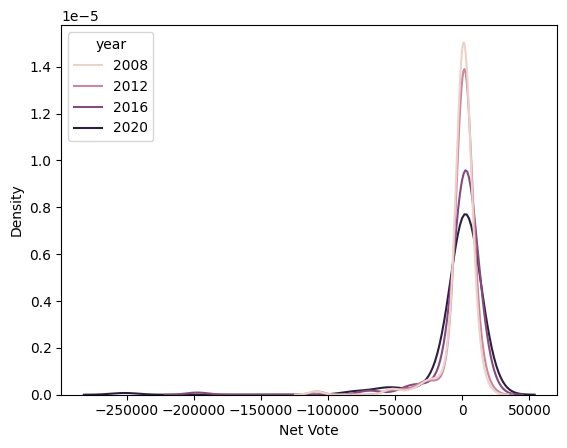

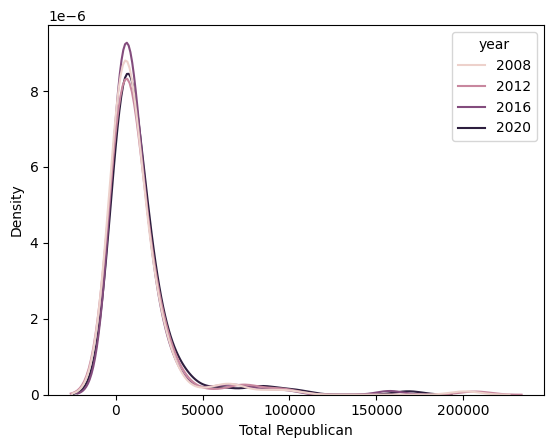

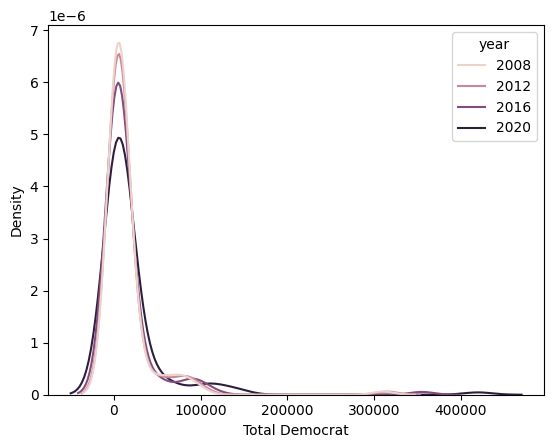

In [5]:
sns.kdeplot(data=df,x='Net Vote',hue='year')
plt.show()
sns.kdeplot(data=df,x='Total Republican',hue='year')
plt.show()
sns.kdeplot(data=df,x='Total Democrat',hue='year')
plt.show()

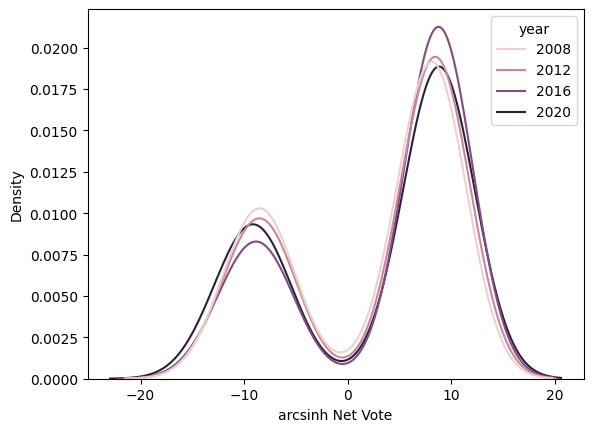

In [6]:
df['arcsinh Net Vote'] = np.arcsinh(df['Net Vote'])
sns.kdeplot(data=df,x='arcsinh Net Vote',hue='year')
plt.show()

#### Build tree

In [7]:
varnames = ["Not Hispanic or Latino: White alone",
       "Not Hispanic or Latino: Black or African American alone",
       "Not Hispanic or Latino: American Indian and Alaska Native alone",
       "Not Hispanic or Latino: Asian alone",
       "Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander alone",
       "Not Hispanic or Latino: Two or more races", "Hispanic or Latino",
       "No schooling completed", "Regular high school diploma",
       "GED or alternative credential", "Some college, less than 1 year",
       "Some college, 1 or more years, no degree", "Associate's degree",
       "Bachelor's degree", "Master's degree", "Professional school degree",
       "Doctorate degree", "Under .50", ".50 to .99", "1.00 to 1.24",
       "1.25 to 1.49", "1.50 to 1.84", "1.85 to 1.99", "2.00 and over",
       "Male: 18 and 19 years", "Male: 20 years", "Male: 21 years",
       "Male: 22 to 24 years", "Male: 25 to 29 years", "Male: 30 to 34 years",
       "Male: 35 to 39 years", "Male: 40 to 44 years", "Male: 45 to 49 years",
       "Male: 50 to 54 years", "Male: 55 to 59 years", "Male: 60 and 61 years",
       "Male: 62 to 64 years", "Male: 65 and 66 years", "Male: 67 to 69 years",
       "Male: 70 to 74 years", "Male: 75 to 79 years", "Male: 80 to 84 years",
       "Male: 85 years and over", "Female: 18 and 19 years",
       "Female: 20 years", "Female: 21 years", "Female: 22 to 24 years",
       "Female: 25 to 29 years", "Female: 30 to 34 years",
       "Female: 35 to 39 years", "Female: 40 to 44 years",
       "Female: 45 to 49 years", "Female: 50 to 54 years",
       "Female: 55 to 59 years", "Female: 60 and 61 years",
       "Female: 62 to 64 years", "Female: 65 and 66 years",
       "Female: 67 to 69 years", "Female: 70 to 74 years",
       "Female: 75 to 79 years", "Female: 80 to 84 years",
       "Female: 85 years and over"]

In [8]:
from sklearn.tree import DecisionTreeRegressor # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree classifier
from sklearn.model_selection import train_test_split # Train/test splitter

In [9]:
y = df['arcsinh Net Vote']
X = df.loc[:,varnames]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

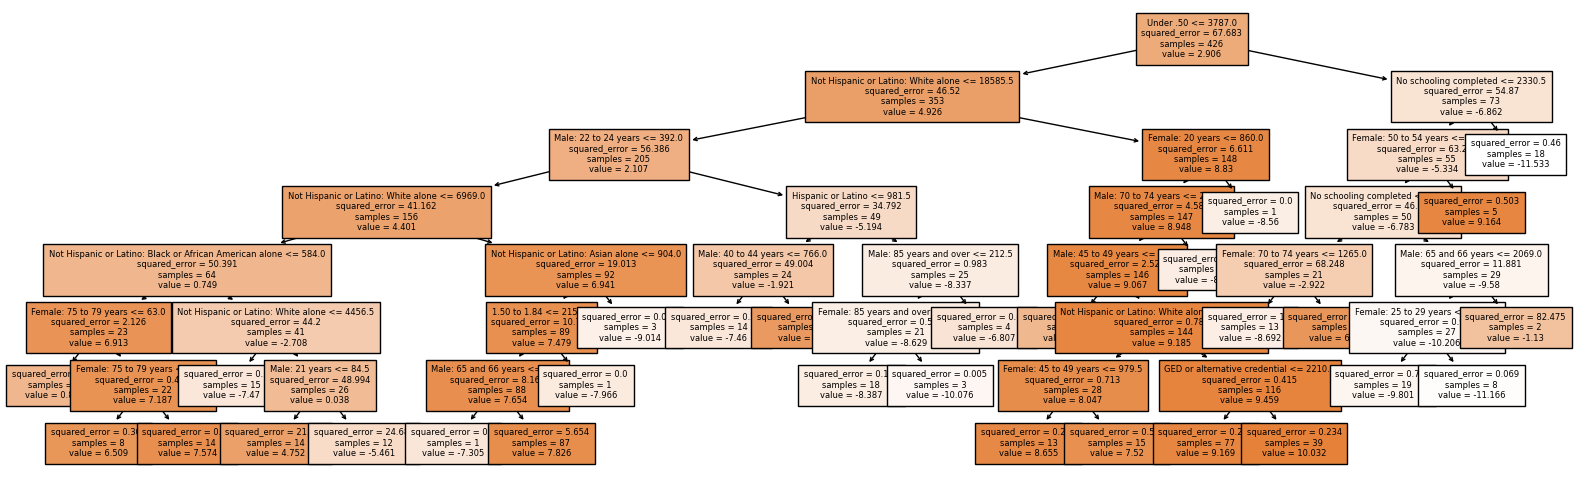

In [ ]:
cart = DecisionTreeRegressor(max_depth=7,criterion='squared_error',min_samples_split=20,random_state=1)
cart = cart.fit(X_train,y_train) # fit the regression
# visualize results
var_names = cart.feature_names_in_
plt.figure(figsize=(20,6))
plot_tree(cart, filled=True, feature_names=var_names, fontsize=6)
plt.show()

In [ ]:
# make predictions on the test set
y_hat = cart.predict(X_test)

# residuals, rsq, rmse
e = y_test - y_hat
rsq = 1-np.sum(e**2)/np.sum((y_test - np.mean(y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print(f'Rsq for tree depth of 7: {rsq}')
print(f'RMSE for tree depth of 7: {RMSE}')

Rsq for tree depth of 4: 0.6144123303716118
RMSE for tree depth of 4: 5.392002564225282


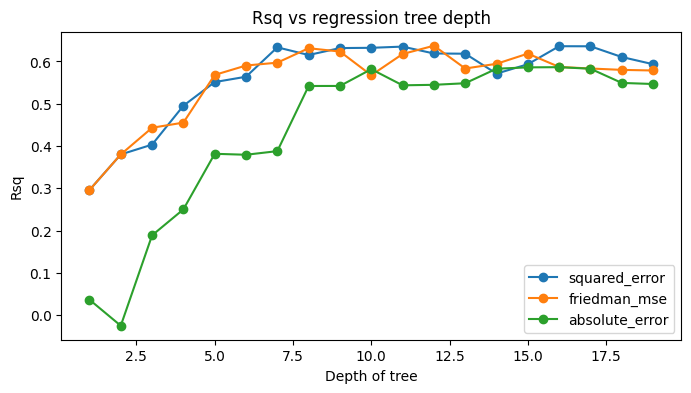

In [ ]:
depths = np.arange(1,20,1)
rsq_results = {}
RMSE_results = {}

criterions = ['squared_error', 'friedman_mse', 'absolute_error']
for crit in criterions:
  rsq = []
  RMSE = []
  for dep in depths:
    # fit decision tree with given depth
    cart = DecisionTreeRegressor(max_depth=dep,criterion=crit,min_samples_split=20)
    cart = cart.fit(X_train,y_train) # fit the regression
    var_names = cart.feature_names_in_

    # make predictions on the test set
    y_hat = cart.predict(X_test)

    # residuals, rsq, rmse
    e = y_test - y_hat
    rsq_val = 1-np.sum(e**2)/np.sum((y_test - np.mean(y_train))**2)
    rsq.append(rsq_val)
    rmse_val = np.sqrt(np.mean(e**2))
    RMSE.append(rmse_val)

  rsq_results[crit] = rsq
  RMSE_results[crit] = RMSE

plt.figure(figsize=(8,4))
for crit in criterions:
  plt.plot(depths,rsq_results[crit],marker='o',label=crit)
plt.title("Rsq vs regression tree depth")
plt.legend()
plt.xlabel("Depth of tree")
plt.ylabel("Rsq")
plt.show()

Try adding county label

In [54]:
# varnames = ["Not Hispanic or Latino: White alone",
#        "Not Hispanic or Latino: Black or African American alone",
#        "Not Hispanic or Latino: American Indian and Alaska Native alone",
#        "Not Hispanic or Latino: Asian alone",
#        "Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander alone",
#        "Not Hispanic or Latino: Two or more races", "Hispanic or Latino",
#        "No schooling completed", "Regular high school diploma",
#        "GED or alternative credential", "Some college, less than 1 year",
#        "Some college, 1 or more years, no degree", "Associate's degree",
#        "Bachelor's degree", "Master's degree", "Professional school degree",
#        "Doctorate degree", "Under .50", ".50 to .99", "1.00 to 1.24",
#        "1.25 to 1.49", "1.50 to 1.84", "1.85 to 1.99", "2.00 and over",
#        "Male: 18 and 19 years", "Male: 20 years", "Male: 21 years",
#        "Male: 22 to 24 years", "Male: 25 to 29 years", "Male: 30 to 34 years",
#        "Male: 35 to 39 years", "Male: 40 to 44 years", "Male: 45 to 49 years",
#        "Male: 50 to 54 years", "Male: 55 to 59 years", "Male: 60 and 61 years",
#        "Male: 62 to 64 years", "Male: 65 and 66 years", "Male: 67 to 69 years",
#        "Male: 70 to 74 years", "Male: 75 to 79 years", "Male: 80 to 84 years",
#        "Male: 85 years and over", "Female: 18 and 19 years",
#        "Female: 20 years", "Female: 21 years", "Female: 22 to 24 years",
#        "Female: 25 to 29 years", "Female: 30 to 34 years",
#        "Female: 35 to 39 years", "Female: 40 to 44 years",
#        "Female: 45 to 49 years", "Female: 50 to 54 years",
#        "Female: 55 to 59 years", "Female: 60 and 61 years",
#        "Female: 62 to 64 years", "Female: 65 and 66 years",
#        "Female: 67 to 69 years", "Female: 70 to 74 years",
#        "Female: 75 to 79 years", "Female: 80 to 84 years",
#        "Female: 85 years and over","county_fips"]

y = df['arcsinh Net Vote']
X = df.loc[:,varnames]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

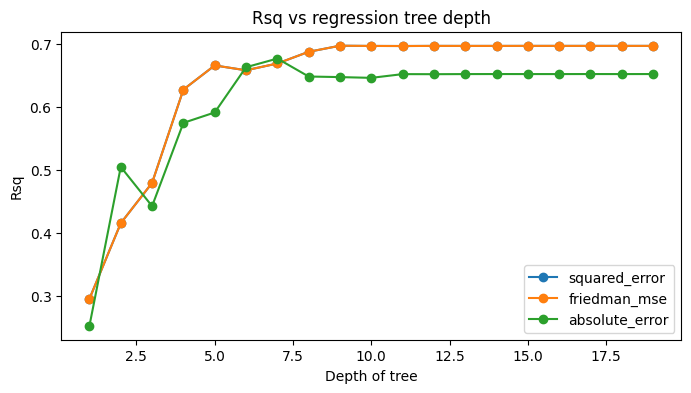

In [55]:
depths = np.arange(1,20,1)
rsq_results = {}
RMSE_results = {}

criterions = ['squared_error', 'friedman_mse', 'absolute_error']
for crit in criterions:
  rsq = []
  RMSE = []
  for dep in depths:
    # fit decision tree with given depth
    cart = DecisionTreeRegressor(max_depth=dep,criterion=crit,min_samples_split=20)
    cart = cart.fit(X_train,y_train) # fit the regression
    var_names = cart.feature_names_in_

    # make predictions on the test set
    y_hat = cart.predict(X_test)

    # residuals, rsq, rmse
    e = y_test - y_hat
    rsq_val = 1-np.sum(e**2)/np.sum((y_test - np.mean(y_train))**2)
    rsq.append(rsq_val)
    rmse_val = np.sqrt(np.mean(e**2))
    RMSE.append(rmse_val)

  rsq_results[crit] = rsq
  RMSE_results[crit] = RMSE

plt.figure(figsize=(8,4))
for crit in criterions:
  plt.plot(depths,rsq_results[crit],marker='o',label=crit)
plt.title("Rsq vs regression tree depth")
plt.legend()
plt.xlabel("Depth of tree")
plt.ylabel("Rsq")
plt.show()

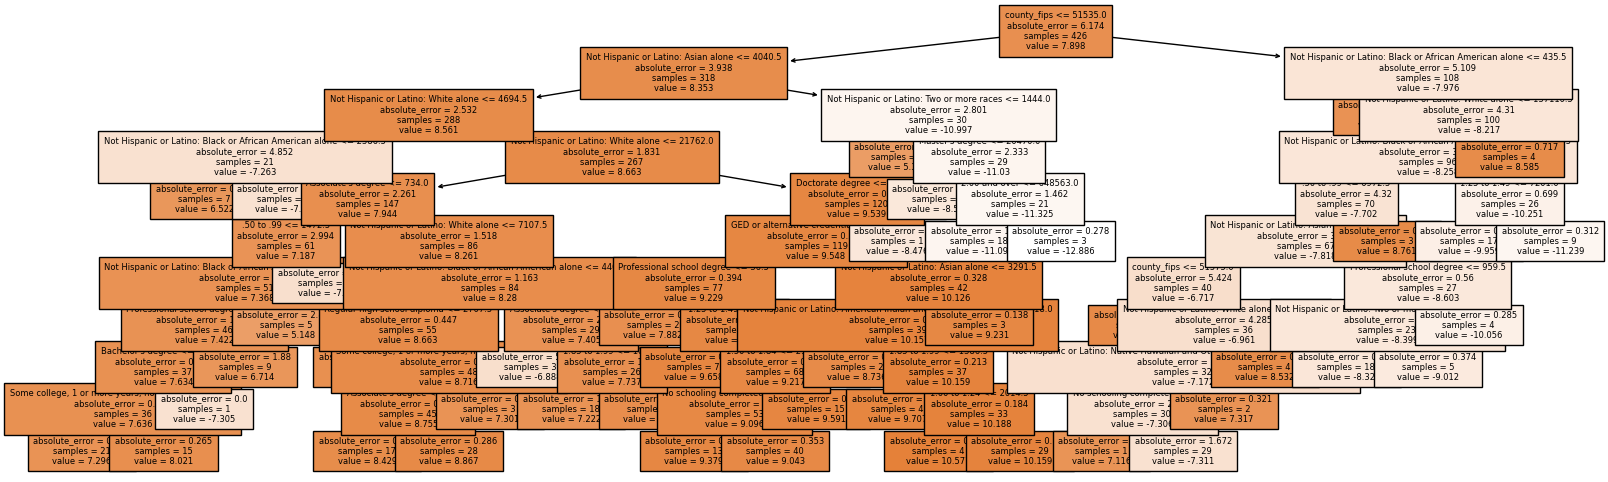

Rsq for tree depth of 10: 0.6455985149210111
RMSE for tree depth of 10: 5.169354165959444


In [56]:
cart = DecisionTreeRegressor(max_depth=10,criterion='absolute_error',min_samples_split=20,random_state=1)
cart = cart.fit(X_train,y_train) # fit the regression
# visualize results
var_names = cart.feature_names_in_
plt.figure(figsize=(20,6))
plot_tree(cart, filled=True, feature_names=var_names, fontsize=6)
plt.show()

# make predictions on the test set
y_hat = cart.predict(X_test)

# residuals, rsq, rmse
e = y_test - y_hat
rsq = 1-np.sum(e**2)/np.sum((y_test - np.mean(y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print(f'Rsq for tree depth of 10: {rsq}')
print(f'RMSE for tree depth of 10: {RMSE}')

In [57]:
np.sum(np.sinh((y_hat))) # democrats win!

-368993.3307572013

Test LASSO

In [12]:
# Scale data:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

scaler = StandardScaler()
scaler.fit(X_train)
X_sc = scaler.transform(X_train)

# Run LASSO:
reg = linear_model.Lasso(alpha=1.0,
                         warm_start=True,
                         max_iter=2000,
                         fit_intercept=True)
reg.fit(X_sc,y_train)

sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,Not Hispanic or Latino: White alone,-0.000000
1,Not Hispanic or Latino: Black or African Ameri...,-1.730942
2,Not Hispanic or Latino: American Indian and Al...,-0.000000
3,Not Hispanic or Latino: Asian alone,-0.000000
4,Not Hispanic or Latino: Native Hawaiian and Ot...,-0.000000
...,...,...
58,Female: 70 to 74 years,-0.000000
59,Female: 75 to 79 years,-0.000000
60,Female: 80 to 84 years,-0.000000
61,Female: 85 years and over,-0.000000


In [13]:
X_sc_test = scaler.transform(X_test)

r_squared = reg.score(X_sc_test, y_test)
print("R-squared:", r_squared)

# Create a DataFrame for coefficients
sdf = pd.DataFrame({'variable': X.columns, 'slope': reg.coef_})

R-squared: 0.38485945102793684


Test ensemble learning

Test random forest

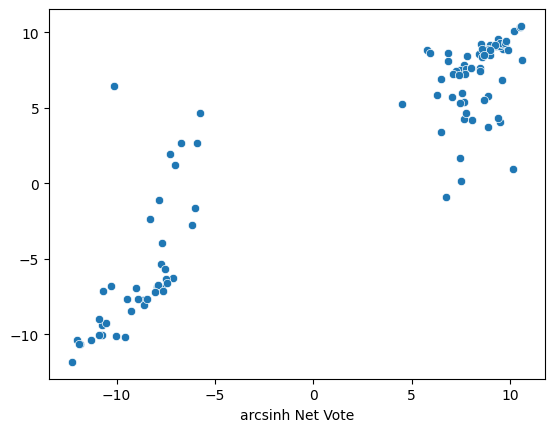

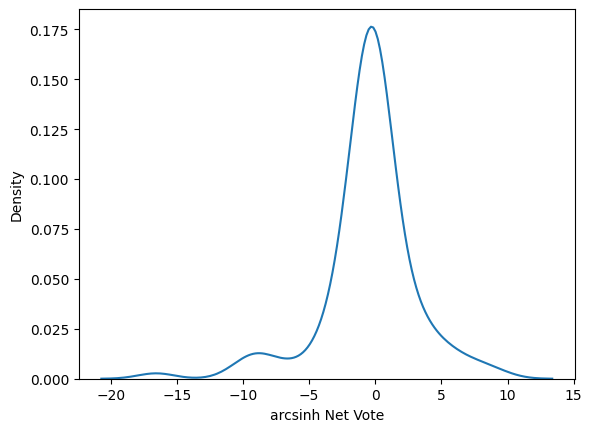

0.8305623892855555

In [58]:
from sklearn.ensemble import RandomForestRegressor
# Fit model:
model = RandomForestRegressor() # Build a random forest model
rf = model.fit(X_train,y_train) # Fit the rf model

# Make predictions:
y_hat_rf = rf.predict(X_test) # Model predictions

sns.scatterplot(x=y_test, y=y_hat_rf) # Predicted v Actual
plt.show()

# Residual plot:
residual = y_test - y_hat_rf
sns.kdeplot(x=residual)
plt.show()

rf.score(X_test,y_test) # Rsq measure

In [59]:
np.sum(np.sinh((y_hat_rf))) # republicans win!

-48489.86245123442

<Axes: >

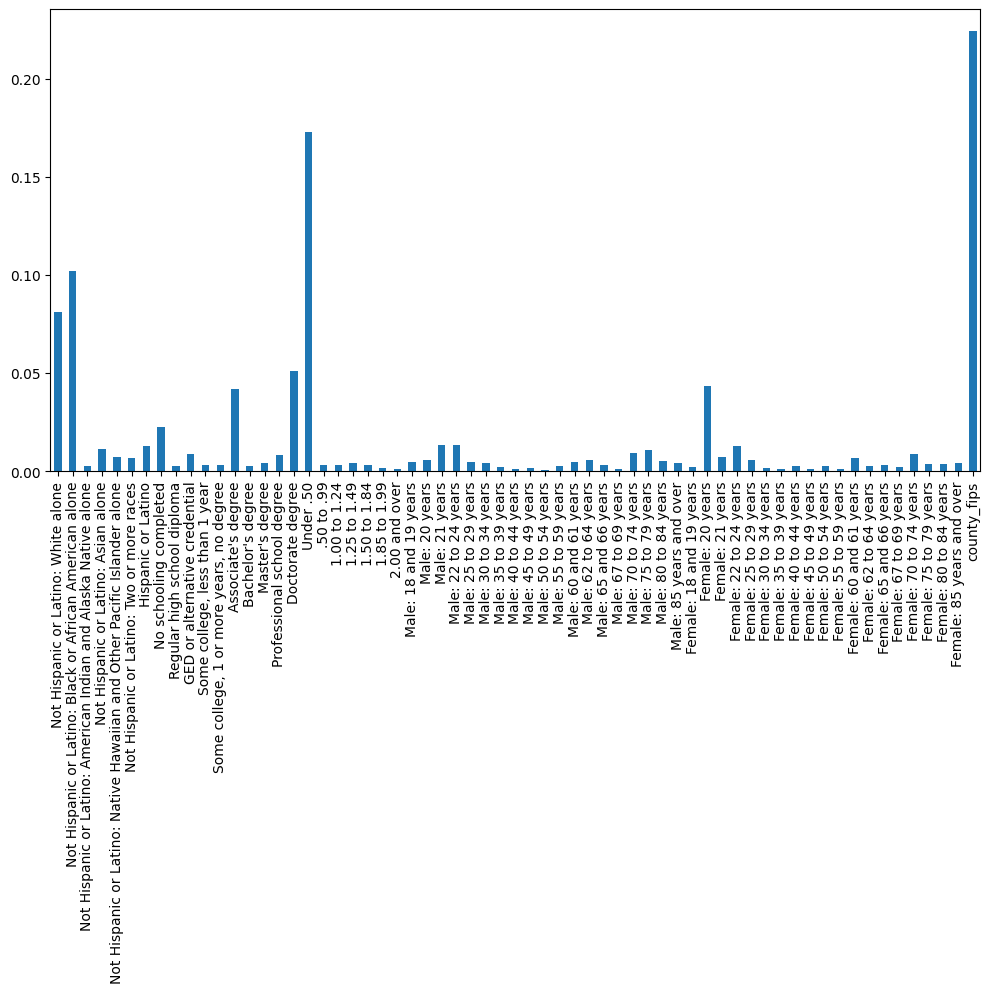

In [17]:
plt.figure(figsize=(12,6))
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns )
forest_importances.plot.bar()

Try to make some maps

Try using 2008, 2012, 2016 as training, 2020 as testing. assume 2024 is a repeat of 2020

In [48]:
varnames = ["Not Hispanic or Latino: White alone",
       "Not Hispanic or Latino: Black or African American alone",
       "Not Hispanic or Latino: American Indian and Alaska Native alone",
       "Not Hispanic or Latino: Asian alone",
       "Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander alone",
       "Not Hispanic or Latino: Two or more races", "Hispanic or Latino",
       "No schooling completed", "Regular high school diploma",
       "GED or alternative credential", "Some college, less than 1 year",
       "Some college, 1 or more years, no degree", "Associate's degree",
       "Bachelor's degree", "Master's degree", "Professional school degree",
       "Doctorate degree", "Under .50", ".50 to .99", "1.00 to 1.24",
       "1.25 to 1.49", "1.50 to 1.84", "1.85 to 1.99", "2.00 and over","county_fips"]


In [49]:
df_train = df[(df['year'] == 2016) | (df['year'] == 2012) | (df['year'] == 2008)]
df_test = df[(df['year'] == 2020)]

y_train = df_train['arcsinh Net Vote']
X_train = df_train.loc[:,varnames]

y_test = df_test['arcsinh Net Vote']
X_test = df_test.loc[:,varnames]

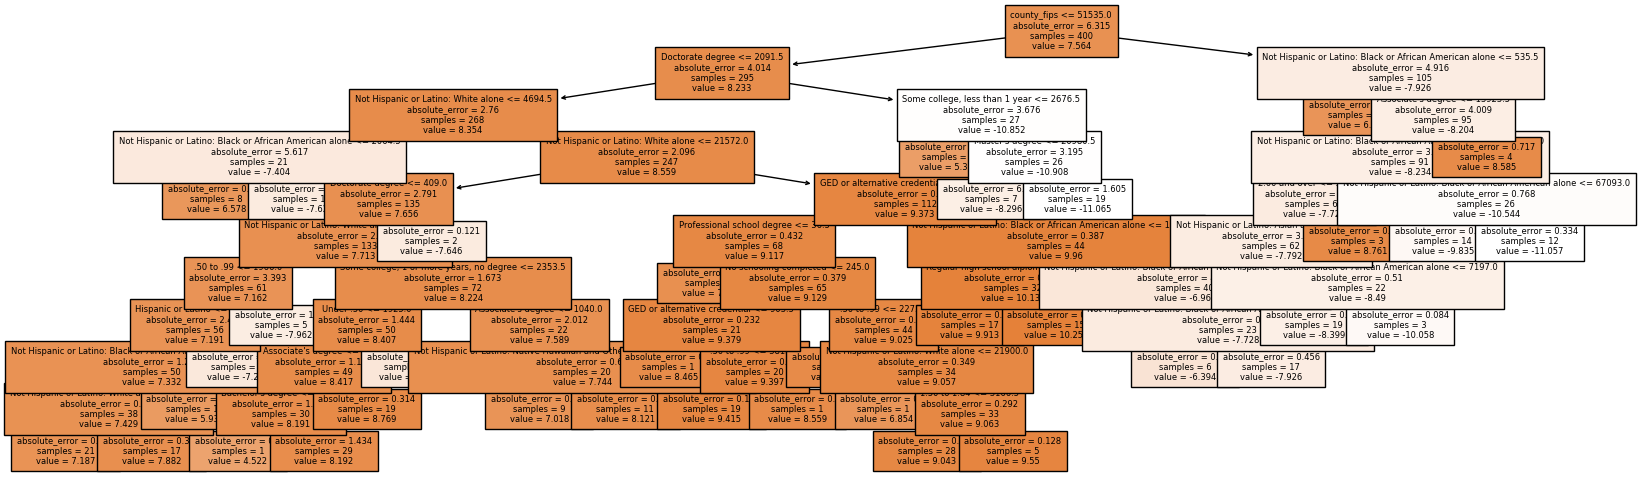

Rsq for tree depth of 10: 0.6574233139993148
RMSE for tree depth of 10: 5.072277878882225


In [50]:
cart = DecisionTreeRegressor(max_depth=10,criterion='absolute_error',min_samples_split=20,random_state=1)
cart = cart.fit(X_train,y_train) # fit the regression
# visualize results
var_names = cart.feature_names_in_
plt.figure(figsize=(20,6))
plot_tree(cart, filled=True, feature_names=var_names, fontsize=6)
plt.show()

# make predictions on the test set
y_hat = cart.predict(X_test)

# residuals, rsq, rmse
e = y_test - y_hat
rsq = 1-np.sum(e**2)/np.sum((y_test - np.mean(y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print(f'Rsq for tree depth of 10: {rsq}')
print(f'RMSE for tree depth of 10: {RMSE}')

In [51]:
np.sum(np.sinh((y_hat))) # democrats win!

-73523.67365368099

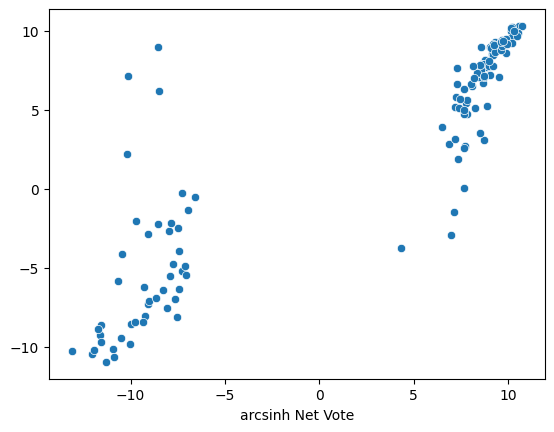

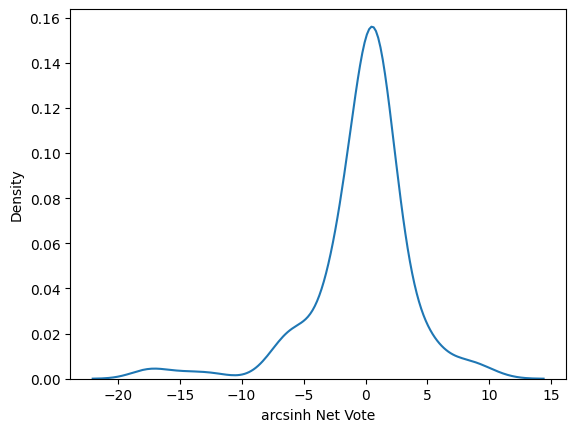

0.7909184280743746

In [52]:
from sklearn.ensemble import RandomForestRegressor
# Fit model:
model = RandomForestRegressor() # Build a random forest model
rf = model.fit(X_train,y_train) # Fit the rf model

# Make predictions:
y_hat_rf = rf.predict(X_test) # Model predictions

sns.scatterplot(x=y_test, y=y_hat_rf) # Predicted v Actual
plt.show()

# Residual plot:
residual = y_test - y_hat_rf
sns.kdeplot(x=residual)
plt.show()

rf.score(X_test,y_test) # Rsq measure

In [53]:
np.sum(np.sinh((y_hat_rf))) # republicans win!

104707.13904646754

In [42]:
predictions=X_test.copy()
predictions['pred Net Vote'] = np.sinh(y_hat_rf)

In [43]:
predictions

,Not Hispanic or Latino: White alone,Not Hispanic or Latino: Black or African American alone,Not Hispanic or Latino: American Indian and Alaska Native alone,Not Hispanic or Latino: Asian alone,Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander alone,Not Hispanic or Latino: Two or more races,Hispanic or Latino,No schooling completed,Regular high school diploma,GED or alternative credential,...,Female: 60 and 61 years,Female: 62 to 64 years,Female: 65 and 66 years,Female: 67 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 years and over,county_fips,pred Net Vote
400,19505,9390,48,244,0,445,2880,143,7525,1246,...,310,798,575,780,1027,626,540,588,51001,959.312424
401,83403,9936,284,5902,48,2783,6272,575,9133,1603,...,1594,2181,1525,2191,2495,2086,1582,1468,51003,-13.885321
402,13733,790,0,10,0,233,231,72,4119,642,...,189,454,240,310,548,365,269,300,51005,592.266577
403,9463,2871,0,1,0,227,408,171,3308,659,...,100,491,119,107,528,249,164,212,51007,424.064750
404,23755,5747,243,209,12,881,787,314,6944,1745,...,606,658,499,620,896,691,538,473,51009,3645.723324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,44706,37218,127,1892,9,3129,4098,686,13394,2738,...,1410,1730,1007,1568,1675,1441,767,971,51800,-4213.662418
529,275271,82565,829,31447,387,21371,37894,2495,52351,11816,...,6142,7650,5262,7194,8383,6687,4557,4465,51810,546.438864
530,16614,2667,134,378,95,502,1910,391,4189,1027,...,371,390,191,477,434,453,369,458,51820,-1.632781
531,10214,2285,36,997,0,393,1085,10,1186,312,...,163,278,64,317,312,251,297,83,51830,-32.482266


In [45]:
np.sum(np.sinh(df_test['arcsinh Net Vote']))

-451138.0

In [47]:
np.sum(np.sinh(df_train['arcsinh Net Vote']))

-596157.0